In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [11]:
import plotly.express as px
import pickle
import seaborn as sns
import omama.omama.global_df_pyplot_ex as g
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = '/home/p.bendiksen001/deephealth/'

In [4]:
global_plot = g.Global_Plot(path)

Total dicoms available
Counter({'2D': 895834, '3D': 72157})
Counter({'NonCancer': 922925, 'No Label information': 27810, 'IndexCancer': 15341, 'PreIndexCancer': 1915})
Counter({'L': 484410, 'R': 483458, 'B': 123})


In [5]:
df_global = global_plot.index_pre_missing_values()
df_global.head(10)

,folder,image,StudyInstanceUID,Imagelaterality,label,PatientAge,Shape,Manufacturer,Modality
0,/raid/data01/deephealth/dh_dcm_ast/2.25.100000...,2D,2.25.100000201839274263174475898571171534853,L,NonCancer,541M,"(3062, 2394)",GE MEDICAL SYSTEMS,MG
1,/raid/data01/deephealth/dh_dcm_ast/2.25.100000...,2D,2.25.100000201839274263174475898571171534853,R,NonCancer,541M,"(3062, 2394)",GE MEDICAL SYSTEMS,MG
2,/raid/data01/deephealth/dh_dcm_ast/2.25.100000...,2D,2.25.100000201839274263174475898571171534853,L,NonCancer,541M,"(3062, 2394)",GE MEDICAL SYSTEMS,MG
3,/raid/data01/deephealth/dh_dcm_ast/2.25.100000...,2D,2.25.100000201839274263174475898571171534853,R,NonCancer,541M,"(3062, 2394)",GE MEDICAL SYSTEMS,MG
4,/raid/data01/deephealth/dh_dcm_ast/2.25.100000...,2D,2.25.100000625325569371753126863626315692897,R,NonCancer,366M,"(2294, 1914)",GE MEDICAL SYSTEMS,MG
5,/raid/data01/deephealth/dh_dcm_ast/2.25.100000...,2D,2.25.100000625325569371753126863626315692897,R,NonCancer,366M,"(2294, 1914)",GE MEDICAL SYSTEMS,MG
6,/raid/data01/deephealth/dh_dcm_ast/2.25.100000...,2D,2.25.100000625325569371753126863626315692897,L,NonCancer,366M,"(2294, 1914)",GE MEDICAL SYSTEMS,MG
7,/raid/data01/deephealth/dh_dcm_ast/2.25.100000...,2D,2.25.100000625325569371753126863626315692897,L,NonCancer,366M,"(2294, 1914)",GE MEDICAL SYSTEMS,MG
8,/raid/data01/deephealth/dh_dcm_ast/2.25.100001...,2D,2.25.100001373726337750354689693677327988604,L,NonCancer,485M,"(3062, 2394)",GE MEDICAL SYSTEMS,MG
9,/raid/data01/deephealth/dh_dcm_ast/2.25.100001...,2D,2.25.100001373726337750354689693677327988604,L,NonCancer,485M,"(3062, 2394)",GE MEDICAL SYSTEMS,MG


In [40]:
#Get dcm_ast DF (includes images with no label information)
df_ast = df_global[df_global['folder'].str.contains("dh_dcm_ast")]

#Image count within and across Image Types
image_group_by_ast = df_ast.groupby(['image'])
ast_3d_count = len(image_group_by_ast.groups['3D'])
ast_2d_count = len(image_group_by_ast.groups['2D'])
ast_count = df_ast['folder'].count()

print(f"Total image count: {ast_count} \n2D image count: {ast_2d_count} \n3D image count: {ast_3d_count} \n")

# Get the dataframe's number of images without labels 
df_ast_no_label = df_ast[(df_ast['label'] == 'No Label information')]
df_ast_no_label = df_ast_no_label.groupby(['image']).filter(lambda x: any(x['label'] == 'No Label information'))
ast_no_label_count = len(df_ast_no_label)
print(f"Total images without labels: {ast_no_label_count}")

# Get the number of images without labels across image type
ast_2d_no_label_count = image_group_by_ast['label'].apply(lambda x: (x=='No Label information').sum()).reset_index(name='count')['count'][0]
ast_3d_no_label_count = image_group_by_ast['label'].apply(lambda x: (x=='No Label information').sum()).reset_index(name='count')['count'][1]
print(f"{image_group_by_ast['label'].apply(lambda x: (x=='No Label information').sum()).reset_index(name='count')}\n")

ast_complete_images = (ast_3d_count - ast_3d_no_label_count) + (ast_2d_count - ast_2d_no_label_count)

Total image count: 819387 
2D image count: 819329 
3D image count: 58 

Total images without labels: 18097
  image  count
0    2D  18097
1    3D      0



In [41]:
#Get dh0new DF (includes images with no label information)
df_dh0new = df_global[df_global['folder'].str.contains("dh_dh0new")]

#Image count within and across Image Types
image_group_by_dh0new = df_dh0new.groupby(['image'])
dh0new_3d_count = len(image_group_by_dh0new.groups['3D'])
dh0new_2d_count = len(image_group_by_dh0new.groups['2D'])
dh0new_count = df_dh0new['folder'].count()

print(f"Total image count: {dh0new_count} \n2D image count: {dh0new_2d_count} \n3D image count: {dh0new_3d_count} \n")

# Get the dataframe's number of images without labels 
df_dh0new_no_label = df_dh0new[(df_dh0new['label'] == 'No Label information')]
df_dh0new_no_label = df_dh0new_no_label.groupby(['image']).filter(lambda x: any(x['label'] == 'No Label information'))
dh0new_no_label_count = len(df_dh0new_no_label)
print(f"Total images without labels: {dh0new_no_label_count}")

# Get the number of images without labels across image type
dh0new_2d_no_label_count = image_group_by_dh0new['label'].apply(lambda x: (x=='No Label information').sum()).reset_index(name='count')['count'][0]
dh0new_3d_no_label_count = image_group_by_dh0new['label'].apply(lambda x: (x=='No Label information').sum()).reset_index(name='count')['count'][1]
print(f"{image_group_by_dh0new['label'].apply(lambda x: (x=='No Label information').sum()).reset_index(name='count')}\n")

dh0new_complete_images = (dh0new_3d_count - dh0new_3d_no_label_count) + (dh0new_2d_count - dh0new_2d_no_label_count)

Total image count: 126460 
2D image count: 63724 
3D image count: 62736 

Total images without labels: 8333
  image  count
0    2D   4326
1    3D   4007



In [42]:
#Get dh2 DF (includes images with no label information)
df_dh2 = df_global[df_global['folder'].str.contains("dh_dh2")]

#Image count within and across Image Types
image_group_by_dh2 = df_dh2.groupby(['image'])
dh2_3d_count = len(image_group_by_dh2.groups['3D'])
dh2_2d_count = len(image_group_by_dh2.groups['2D'])
dh2_count = df_dh2['folder'].count()

print(f"Total image count: {dh2_count} \n2D image count: {dh2_2d_count} \n3D image count: {dh2_3d_count} \n")

# Get the dataframe's number of images without labels 
df_dh2_no_label = df_dh2[(df_dh2['label'] == 'No Label information')]
df_dh2_no_label = df_dh2_no_label.groupby(['image']).filter(lambda x: any(x['label'] == 'No Label information'))
dh2_no_label_count = len(df_dh2_no_label)

print(f"Total images without labels: {dh2_no_label_count}")

# Get the number of images without labels across image type
dh2_2d_no_label_count = image_group_by_dh2['label'].apply(lambda x: (x=='No Label information').sum()).reset_index(name='count')['count'][0]
dh2_3d_no_label_count = image_group_by_dh2['label'].apply(lambda x: (x=='No Label information').sum()).reset_index(name='count')['count'][1]
print(f"{image_group_by_dh2['label'].apply(lambda x: (x=='No Label information').sum()).reset_index(name='count')}\n")

dh2_complete_images = (dh2_3d_count - dh2_3d_no_label_count) + (dh2_2d_count - dh2_2d_no_label_count)

Total image count: 22144 
2D image count: 12781 
3D image count: 9363 

Total images without labels: 1380
  image  count
0    2D    768
1    3D    612



In [43]:
#Get Global DF (includes images with no label information)

#Image count within and across Image Types
image_group_by = df_global.groupby(['image'])
global_3d_count = len(image_group_by.groups['3D'])
global_2d_count = len(image_group_by.groups['2D'])
global_count = df_global['folder'].count()

print(f"Total image count: {global_count} \n2D image count: {global_2d_count} \n3D image count: {global_3d_count} \n")

# Get the dataframe's number of images without labels 
df_no_label = df_global[(df_global['label'] == 'No Label information')]
df_no_label = df_no_label.groupby(['image']).filter(lambda x: any(x['label'] == 'No Label information'))
global_no_label_count = len(df_no_label)

print(f"Total images without labels: {global_no_label_count}")

# Get the number of images without labels across image type
global_2d_no_label_count = image_group_by['label'].apply(lambda x: (x=='No Label information').sum()).reset_index(name='count')['count'][0]
global_3d_no_label_count = image_group_by['label'].apply(lambda x: (x=='No Label information').sum()).reset_index(name='count')['count'][1]
print(f"{image_group_by['label'].apply(lambda x: (x=='No Label information').sum()).reset_index(name='count')}\n")

global_complete_images = (global_3d_count - global_3d_no_label_count) + (global_2d_count - global_2d_no_label_count)


Total image count: 967991 
2D image count: 895834 
3D image count: 72157 

Total images without labels: 27810
  image  count
0    2D  23191
1    3D   4619



<IPython.core.display.Javascript object>


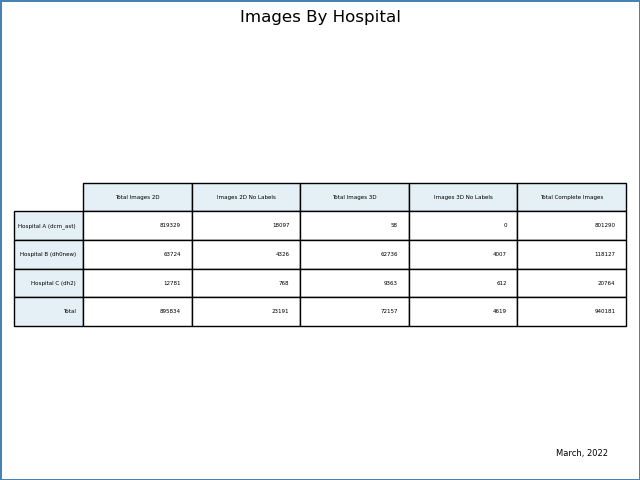

In [44]:
title_text = 'Images By Hospital'
footer_text = 'March, 2022'
fig_background_color = 'white'
fig_border = 'steelblue'

data =  [
            [         'Total Images 2D', 'Images 2D No Labels', 'Total Images 3D', 'Images 3D No Labels', 'Total Complete Images'],
            [ 'Hospital A (dcm_ast)',  ast_2d_count, ast_2d_no_label_count,   ast_3d_count,  ast_3d_no_label_count, ast_complete_images],
            ['Hospital B (dh0new)',  dh0new_2d_count, dh0new_2d_no_label_count,   dh0new_3d_count,   dh0new_3d_no_label_count, dh0new_complete_images],
            ['Hospital C (dh2)',  dh2_2d_count,  dh2_2d_no_label_count,  dh2_3d_count,  dh2_3d_no_label_count, dh2_complete_images],
            ['Total',  global_2d_count,  global_2d_no_label_count,  global_3d_count,  global_3d_no_label_count, global_complete_images],
        ]
# Pop the headers from the data array
column_headers = data.pop(0)
row_headers = [x.pop(0) for x in data]
# Format data to be non-numeric
cell_text = []
for row in data:
    cell_text.append([f'{x}' for x in row])
    
# Get some lists of color specs for row and column headers
rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))
# Create the figure. Setting a small pad on tight_layout
# seems to better regulate white space. Figsize experimenting
#can produce better outcome.
plt.figure(linewidth=2,
           edgecolor=fig_border,
           facecolor=fig_background_color,
           tight_layout={'pad':1},
           #figsize=(5,3)
          )
# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowColours=rcolors,
                      rowLoc='right',
                      colColours=ccolors,
                      colLabels=column_headers,
                      loc='center')
# Scaling is the only influence we have over top and bottom cell padding.
# Make the rows taller (i.e., make cell y scale larger).
the_table.scale(1, 1.5)
# Hide axes
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# Hide axes border
plt.box(on=None)
# Add title
plt.suptitle(title_text)
# Add footer
plt.figtext(0.95, 0.05, footer_text, horizontalalignment='right', size=6, weight='light')
# Force the figure to update, so backends center objects correctly within the figure.
# Without plt.draw() here, the title will center on the axes and not the figure.
plt.draw()
# Create image. plt.savefig ignores figure edge and face colors, so map them.
fig = plt.gcf()
plt.savefig('dycom_image_counts.png',
            #bbox='tight',
            edgecolor=fig.get_edgecolor(),
            facecolor=fig.get_facecolor(),
            dpi=150
            )

<IPython.core.display.Javascript object>


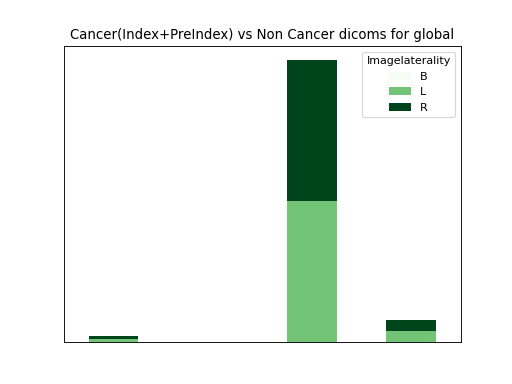

In [10]:
%matplotlib notebook

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

fig=plt.figure()
ax=plt.subplot()

df = global_plot.pyplot_ex()
df.plot(kind='bar', stacked=True, cmap = 'Greens', ax=ax)

bars = [rect for rect in ax.get_children() if isinstance(rect, mpl.patches.Rectangle)]
# bars = ax.bar()

annot = ax.annotate("poop", xy=(0,0), xytext=(-20,20), textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="cyan", ec="b", lw=2),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(True)

def update_annot(bar):
    x = bar.get_x()+bar.get_width()/2.
    y = bar.get_y()+bar.get_height()
    annot.xy = (x,y)
    text = "({:.2g},{:.2g})".format( x,y )
    annot.set_text(text)
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        for bar in bars:
            cont, ind = bar.contains(event)
            if cont:
                update_annot(bar)
                annot.set_visible(True)
                fig.canvas.draw_idle()
                return
    if vis:
        annot.set_visible(False)
        fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.title("Cancer(Index+PreIndex) vs Non Cancer dicoms for global")
plt.ylabel('No. of labels')
plt.show()